#  DSC530-T304 Data Exploration and Analysis - Week 10 #

## Project  ##

-----


- **Your dataset**

- **A PowerPoint presentation outlining your statistical question/hypothesis**
  - A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
  - Describe what the 5 variables mean in the dataset (Chapter 1).
  - Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
  - Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
  - Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).
  - Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
  - Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).
  - Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).
  - Conduct a test on your hypothesis using one of the methods covered in Chapter 9.
  - For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

- **Your code or screenshots of your code**

- **A 250-500-word paper summarizing the following: Statistical/Hypothetical Question**
  - Outcome of your EDA
  - What do you feel was missed during the analysis?
  - Were there any variables you felt could have helped in the analysis?
  - Were there any assumptions made you felt were incorrect?
  - What challenges did you face, what did you not fully understand?

- **Submit a link to your repository to the assignment link during the final week of class.**

### Credit Risk analysis and EDA ###

Introduction


 Lending involves the provision of funds, often in the form of a loan, to individuals, businesses, or other entities, with the anticipation that the borrowed capital will be returned with interest or in adherence to the conditions laid out in a loan agreement. This financial practice is a widespread and pivotal element of the economy.


 Loan default takes place when a borrower does not adhere to the specified terms and conditions outlined in the loan agreement. This often involves a failure to make timely payments or a breach of other contractual commitments.
 

The perpetual chance that a borrower might fail to meet or cease making payments leads to accurately assessing credit risk and it is crucial. Credit risk analytics transforms both historical and projected data into actionable analytical insights, empowering financial institutions to evaluate risk and determine lending and account management strategies. One approach employed by organizations is the integration of credit risk
 modeling into their decision-making processes.
 
 To analyze the credit risk ,  various input features are required
 
- Person Age - Age of the individual applying for the loan. Age can be an indicator of stability and reliability in repaying loans.
- Person Income - Income level or earnings of the individual. Income is a crucial factor in determining the individual's ability to repay the loan. 
- Previous credit history - Record of the individual's past borrowing and repayment behavior.
- Collateral - Assets offered by the borrower as security for the loan. Collateral serves as a form of protection for lenders in case of default
- Intent of loan - Purpose or reason for seeking the loan. The intended use of funds can influence risk assessment. 
- Interest rate - Rate at which interest is charged on the loan amount. The interest rate reflects the cost of borrowing and impacts the affordability of the loan for the borrower

#### **The intent is find out whether the loan is approved and respesented in loan_status** ####

-----

A dataset "credit_risk_dataset" that covers most of the above credit risk features is selected. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
credit_data_df = pd.read_csv("credit_risk_dataset.csv")

In [97]:
credit_data_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


 - The details of the features in the dataset is as below

|Feature Name| Description|
|:--|:-|
|person_age| Age of the person|
|person_income | Annual Income of the person|
person_home_ownership| Home ownership - whether person owns a homeor mortage or rented|
person_emp_length	| Employment length (in years)|
|loan_intent	| Loan intent - intent of the loan|
|loan_grade	| Loan grade - sclae based on credit worthiness|
|loan_amnt	 | Loan amount|
|loan_int_rate	| Interest rate for the loan|
|loan_status	| Loan status -  credit approval |
|loan_percent_income	| Percent income - % of income represented by loan|
|cb_person_default_on_file|	  Historical default (previous default history from Bureau)|
|cb_preson_cred_hist_length|	Credit history length|

In [665]:
#Print the shape of the dataset
print("Shape of the dataset : ", credit_data_df.shape )

Shape of the dataset :  (32416, 12)


- The dataset has 12 features and 32581 records

### Perform Data Cleanup ###
As part of EDA initial celan up is required to remove duplicate values

In [99]:
# perform cleanup
credit_data_df = credit_data_df.drop_duplicates()

In [102]:
# Check the null values count
credit_data_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [103]:
# Print the five point summary for all continous variables
credit_data_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Handling Outliers ####

From the overall five point summary , There are outliers are data entry errors like
1. Age above 100 years
2. Loan seekinf person having a income upto 600K 
3. Employment length well above 65 years

Need to cleanup the data for all the above three conditions
1. Remove records where the age is above 85 (Probability of Persons above age 85 seeking a loan is very low)
2. Filter rows with less than 200K annual income (Probability of Persons earning above seeking loan for 35K is very low)
3. Rremove records having employment value above 65 years (with min age at 15 will lead to age at retirement as 80)



In [110]:
# Remove records where the age is above 85
ref_credit_data_df = credit_data_df[credit_data_df['person_age'] < 86]

In [111]:
ref_credit_data_df.shape

(32410, 12)

6 records removed post age filter 


In [112]:
# Filter rows with less than 200K annual income 
ref_credit_data_df = ref_credit_data_df[ref_credit_data_df['person_income'] < 200001]

In [113]:
ref_credit_data_df.shape

(31967, 12)

443 records removed post income filter

In [115]:
# Remove records having employment value above 65 years
ref_credit_data_df = ref_credit_data_df[ref_credit_data_df['person_emp_length'] < 66]

In [116]:
ref_credit_data_df.shape

(31084, 12)

883 records removed after fitering out employment length above 65

In [123]:
ref_credit_data_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

#### Create dummy columns with continous values for categorical variables ####

There are 4 categorial value features
- person_home_ownership 
- loan_intent
- loan_grade
- cb_person_default_on_file

In [124]:
# Check the unique values of categorical variables
ref_credit_data_df.person_home_ownership.value_counts()

person_home_ownership
RENT        15921
MORTGAGE    12703
OWN          2357
OTHER         103
Name: count, dtype: int64

In [125]:
ref_credit_data_df.loan_intent.value_counts()

loan_intent
EDUCATION            6177
MEDICAL              5790
VENTURE              5445
PERSONAL             5268
DEBTCONSOLIDATION    4967
HOMEIMPROVEMENT      3437
Name: count, dtype: int64

In [126]:
ref_credit_data_df.loan_grade.value_counts()

loan_grade
A    10205
B     9976
C     6206
D     3479
E      928
F      227
G       63
Name: count, dtype: int64

In [127]:
ref_credit_data_df.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    25568
Y     5516
Name: count, dtype: int64

In [128]:
# Convert loan_grade  and cb_person_default_on_file  to continous values
# create dummy columns for those features
ref_credit_data_df['loan_grade_d'] = pd.factorize(ref_credit_data_df['loan_grade'])[0]
ref_credit_data_df['cb_person_default_on_file_d'] = pd.factorize(ref_credit_data_df['cb_person_default_on_file'])[0]
ref_credit_data_df['person_home_ownership_d'] = pd.factorize(ref_credit_data_df['person_home_ownership'])[0]
ref_credit_data_df['loan_intent_d'] = pd.factorize(ref_credit_data_df['loan_intent'])[0]

In [129]:
# List the datatypes to check of the features or columns of Dataframe
ref_credit_data_df.dtypes

person_age                       int64
person_income                    int64
person_home_ownership           object
person_emp_length              float64
loan_intent                     object
loan_grade                      object
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file       object
cb_person_cred_hist_length       int64
loan_grade_d                     int64
cb_person_default_on_file_d      int64
person_home_ownership_d          int64
loan_intent_d                    int64
dtype: object

A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
Describe what the 5 variables mean in the dataset (Chapter 1).
Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

**Below Five variables are idenitfied**

- **person_age**               - Age of the applicant, Age can be an indicator of stability and reliability in repaying loans. Younger individuals might have fewer financial responsibilities but less established credit histories, while older individuals might have more stability but potentially fixed incomes.

- **person_income**          - Income of the applicant, Income is a crucial factor in determining the individual's ability to repay the loan. Higher income generally indicates a greater capacity to meet financial obligations.

- **Home_ownership**       - Home ownership type, Collateral serves as a form of protection for lenders in case of default. It can mitigate risk by providing recourse to recover losses if the borrower fails to repay the loan. 

- **loan_amnt**                  - Loan amount sought, is a fundamental aspect of credit risk analysis. It represents the principal balance that the borrower is obligated to repay. Higher loan amounts may pose higher risks for lenders, especially if they exceed the borrower's capacity to repay based on their income and other financial factors.

- **loan_percent_income** - Loan percent ratio to income, provides insights into the borrower's debt burden relative to their earnings. A high ratio indicates that a significant portion of the borrower's income is allocated to debt repayment, which may increase the risk of default. Lenders often use this ratio to assess the borrower's ability to manage additional debt responsibly.



### Feature : person_age #### 


In [226]:
ref_credit_data_df['person_age'].describe().apply("{0:.2f}".format)

count    31084.00
mean        27.68
std          6.17
min         20.00
25%         23.00
50%         26.00
75%         30.00
max         84.00
Name: person_age, dtype: object

In [227]:
print("Mode Value : ", ref_credit_data_df['person_age'].mode()[0])

Mode Value :  23


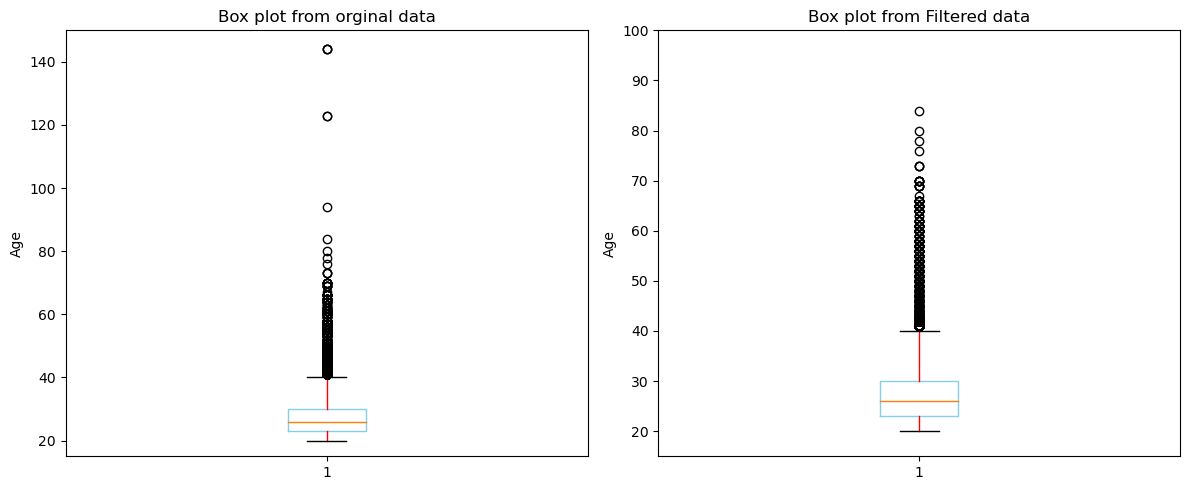

In [506]:
# Display the box plot using the orginal data and refined data where outliers are removed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(credit_data_df['person_age'], boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
axes[0].set_title("Box plot from orginal data")
axes[0].set_ylabel("Age")

axes[1].boxplot(ref_credit_data_df['person_age'], boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
axes[1].set_title("Box plot from Filtered data")
axes[1].set_ylabel("Age")
axes[0].set_ylim(15, 150)
axes[1].set_ylim(15, 100)

plt.tight_layout()
plt.show()

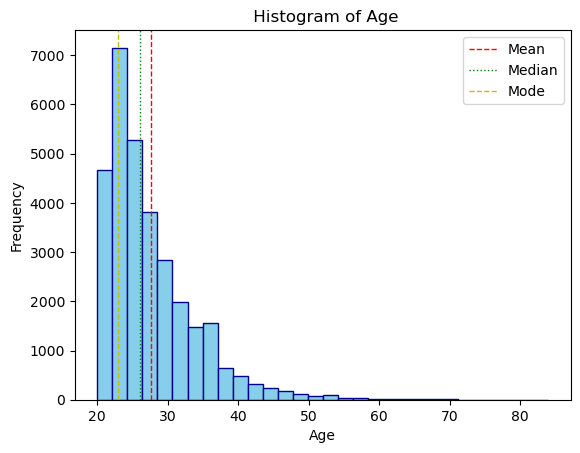

In [243]:
# Creating a  histogram 
plt.hist(ref_credit_data_df['person_age'], bins=30, color='skyblue', edgecolor='darkblue')

# Adding median,  mean and mode lines to visually locate them
plt.axvline(np.mean(ref_credit_data_df['person_age']) , color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(ref_credit_data_df['person_age']), color='g', linestyle='dotted', linewidth=1, label='Median')
plt.axvline(ref_credit_data_df['person_age'].mode()[0], color='y', linestyle='dashed', linewidth=1, label='Mode')

plt.legend()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(' Histogram of Age')
 
# Display the plot
plt.show()

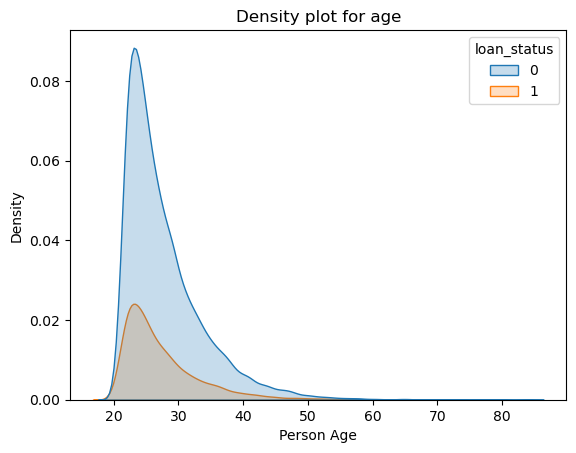

In [241]:
# Density Plot
sns.kdeplot(data=ref_credit_data_df, x="person_age", hue="loan_status", fill=True)
plt.xlabel('Person Age')
plt.title('Density plot for age')

plt.show()

**Observations**


- Even though most of the applicant age,MODE,  is close to 23,  the MEDIAN and MEAN values are located away or their values are more than MODE.
-  The distribution is again skewed to the right with long tail as visible in the density,  box plot and histpgram
-  From the density plot young people loan applications are geting approved and hence lower age has a high probability of getting their loan approved.






### Feature : person_income  ####

In [131]:
ref_credit_data_df['person_income'].describe().apply("{0:.2f}".format)

count     31084.00
mean      62711.41
std       33105.59
min        4000.00
25%       39000.00
50%       55000.00
75%       78000.00
max      200000.00
Name: person_income, dtype: object

In [148]:
print("Mode Value : ", ref_credit_data_df['person_income'].mode()[0])

Mode Value :  60000


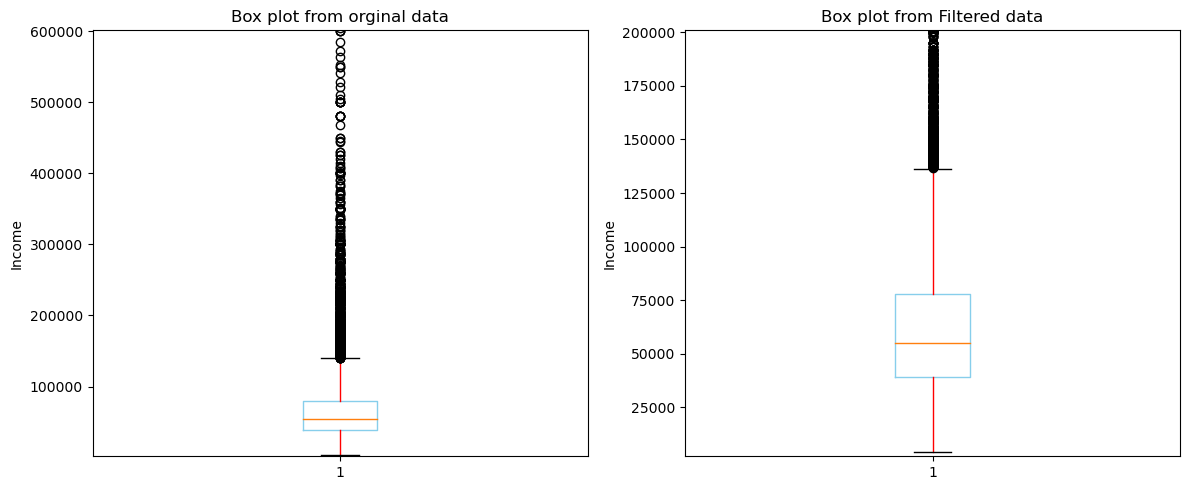

In [151]:
#fig = plt.figure(figsize =(5, 5))

# Creating plot
#plt.boxplot(ref_credit_data_df['person_income'])
 
# show plot
#plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(credit_data_df['person_income'], boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
axes[0].set_title("Box plot from orginal data")
axes[0].set_ylabel("Income")

axes[1].boxplot(ref_credit_data_df['person_income'], boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
axes[1].set_title("Box plot from Filtered data")
axes[1].set_ylabel("Income")
axes[0].set_ylim(2000, 600000+1000)
axes[1].set_ylim(2000, 200000+1000)

plt.tight_layout()
plt.show()


The above figure shows the outliers present before and after data removed

In [253]:
outlier_percent=  len(ref_credit_data_df.loc[ref_credit_data_df['person_income'] > 140000]) * 100 / len(ref_credit_data_df)
print("approximately loan-amount feature has {:.2f}% outliers".format(outlier_percent))

approximately loan-amount feature has 3.31% outliers


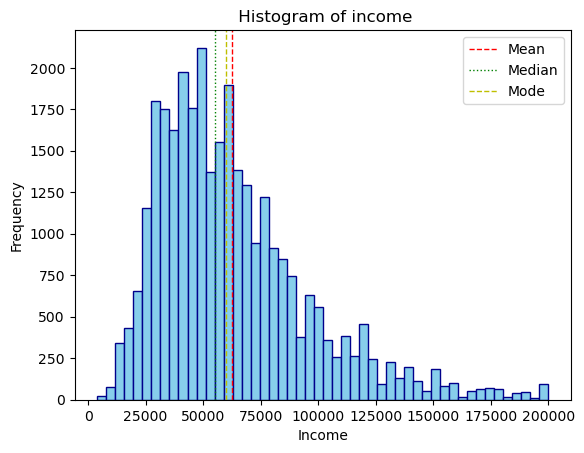

In [147]:
# Creating a  histogram 
plt.hist(ref_credit_data_df['person_income'], bins=50, color='skyblue', edgecolor='darkblue')

# Adding median,  mean and mode lines to visually locate them
plt.axvline(np.mean(ref_credit_data_df['person_income']) , color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(ref_credit_data_df['person_income']), color='g', linestyle='dotted', linewidth=1, label='Median')
plt.axvline(ref_credit_data_df['person_income'].mode()[0], color='y', linestyle='dashed', linewidth=1, label='Mode')

plt.legend()

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title(' Histogram of income')
 
# Display the plot
plt.show()

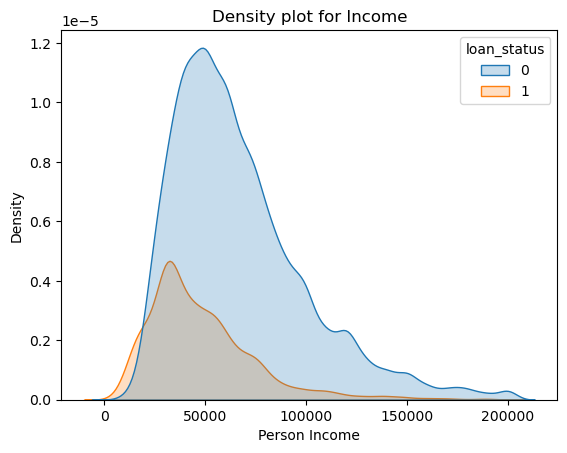

In [242]:
# Density Plot
sns.kdeplot(data=ref_credit_data_df, x="person_income", hue="loan_status", fill=True)
plt.xlabel('Person Income')
plt.title('Density plot for Income')

plt.show()

**Observations for person_income feature**<BR>
    
From the initial data summary ,  it was evident that the data distribution was skewed right with a very long tail. 
After filtering the dataset with income less than 200K,  the distribution is right skewed 
    
- Mean value of 62711.41  is close but located on the right of the median or 2nd quartile confirming the right skew
- Mode value lies between mean and median indicating most of the values are around the mean
- The tails on both side extend beyond 1 standard deviation of 33105.59 on both sides,  more than 2 standard deviation on the right side



### Feature : Home Ownership ###

In [152]:
ref_credit_data_df.person_home_ownership.value_counts()

person_home_ownership
RENT        15921
MORTGAGE    12703
OWN          2357
OTHER         103
Name: count, dtype: int64

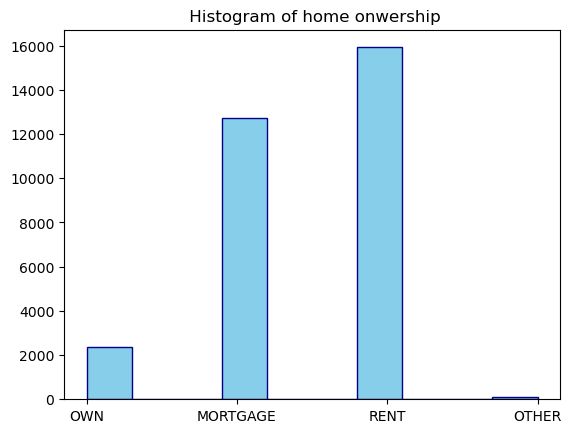

In [154]:
# Creating a  histogram 
plt.hist(ref_credit_data_df['person_home_ownership'], bins=10, color='skyblue', edgecolor='darkblue')

plt.title(' Histogram of home onwership')

# Display the plot
plt.show()

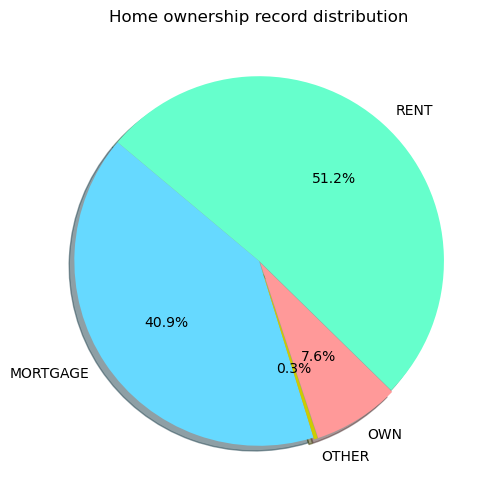

In [199]:
# Create the pie chart
plt.figure(figsize=(6, 6))  

hm_own_category = ref_credit_data_df['person_home_ownership'].groupby( ref_credit_data_df['person_home_ownership'] ).size()

pie_labels = hm_own_category.index.to_list()
pie_values = hm_own_category.to_list()
colors = ['#66d9ff', '#cccc00', '#ff9999', '#66ffcc']
explode = (0, 0.01, 0.01, 0)  

plt.pie(pie_values ,  explode=explode, labels= pie_labels, shadow=True, autopct='%1.1f%%', colors=colors, startangle=140)  
plt.title('Home ownership record distribution')


# Show the plot
plt.show()

In [163]:
ser_loan_apprvd = ref_credit_data_df[ref_credit_data_df["loan_status"] == 0].person_home_ownership.value_counts()
ser_loan_denied = ref_credit_data_df[ref_credit_data_df["loan_status"] == 1].person_home_ownership.value_counts()

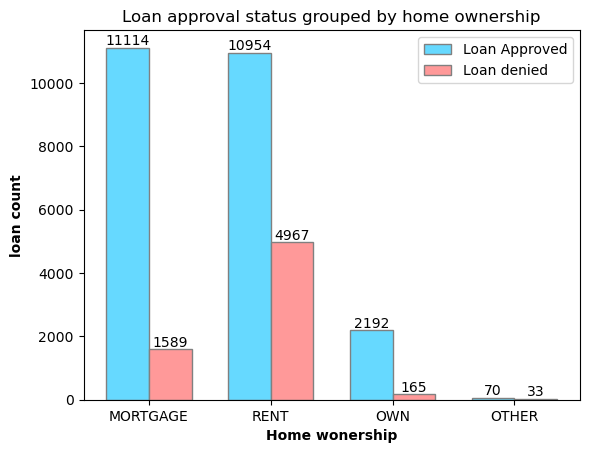

In [201]:
# Convert the value count Series to DataFrame
hm_own_df = pd.concat([ser_loan_apprvd, ser_loan_denied], axis=1)
hm_own_df.columns = ['Loan Approved', 'Loan denied']

# Get positions for each group of bars
r1 = np.arange(len(hm_own_df.index))
r2 = [x + bar_width for x in r1]

# Plot bars for both approved and denied for each home ownership
bar_apprvd = plt.bar(r1, hm_own_df['Loan Approved'], color='#66d9ff', width=bar_width, edgecolor='grey', label='Loan Approved')
bar_den = plt.bar(r2, hm_own_df['Loan denied'], color='#ff9999', width=bar_width, edgecolor='grey', label='Loan denied')


plt.xlabel('Home wonership', fontweight='bold')
# Add unique home ownership lables
plt.xticks([r + bar_width / 2 for r in range(len(hm_own_df.index))], hm_own_df.index)

for bar, value in zip(bar_apprvd, hm_own_df['Loan Approved']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, str(value), ha='center', va='bottom')

for bar, value in zip(bar_den, hm_own_df['Loan denied']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, str(value), ha='center', va='bottom')    
    
# Add y label
plt.ylabel('loan count', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.title('Loan approval status grouped by home ownership')
plt.show()

**Observations**

- Overall home ownership data is unbalanced as mortgage and rented records are available at a higher propotion (91% of total records) than owned and otehr categories
- Home owners (OWN category) and   Mortgaged owners had a higher probability or chance to a get an loan approved.  
- 90% of the OWN category had their loan approved. But due to less number of data available,  it may be overfitting.
- Mortgaged home owners has a 85% probabality of getting loan approved
- Rented people have a 69% chance of getting the loan approved.
- Loan was approved for 68% of the OTHER category people.



### Feature : loan_amnt ###

In [204]:
ref_credit_data_df['loan_amnt'].describe().apply("{0:.2f}".format)

count    31084.00
mean      9551.81
std       6213.06
min        500.00
25%       5000.00
50%       8000.00
75%      12000.00
max      35000.00
Name: loan_amnt, dtype: object

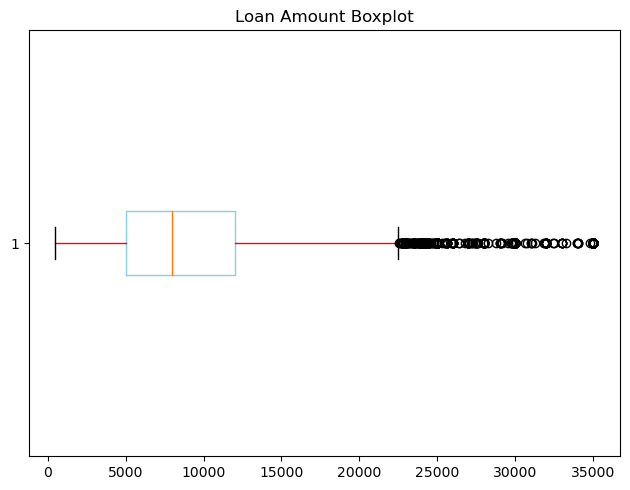

In [509]:
plt.boxplot(ref_credit_data_df['loan_amnt'], vert=False, boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
plt.tight_layout()
plt.title("Loan Amount Boxplot")
plt.show()


In [214]:
outlier_percent=  len(ref_credit_data_df.loc[ref_credit_data_df['loan_amnt'] > 22000]) * 100 / len(ref_credit_data_df)
print("approximately loan-amount feature has {:.2f}% outliers".format(outlier_percent))

approximately loan-amount has 5.13% outliers


In [252]:
print("Mode Value : ", ref_credit_data_df['loan_amnt'].mode()[0])

Mode Value :  10000


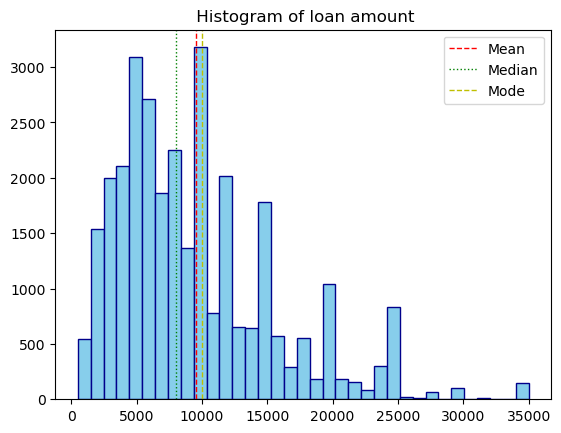

In [225]:
# Creating a  histogram 
plt.hist(ref_credit_data_df['loan_amnt'], bins=35, color='skyblue', edgecolor='darkblue')

# Adding median,  mean and mode lines to visually locate them
plt.axvline(np.mean(ref_credit_data_df['loan_amnt']) , color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(ref_credit_data_df['loan_amnt']), color='g', linestyle='dotted', linewidth=1, label='Median')
plt.axvline(ref_credit_data_df['loan_amnt'].mode()[0], color='y', linestyle='dashed', linewidth=1, label='Mode')


plt.title(' Histogram of loan amount')

# Add legend
plt.legend()

# Display the plot
plt.show()

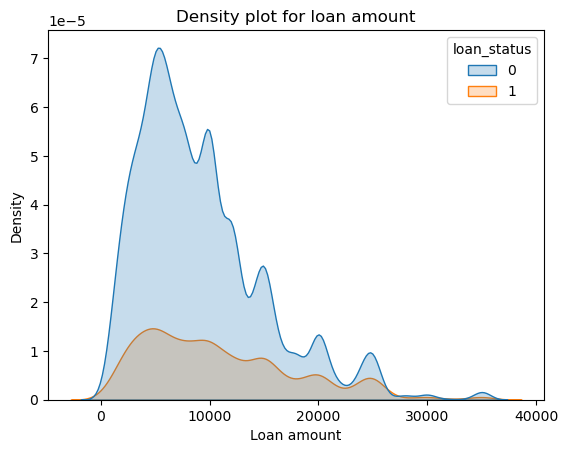

In [246]:
# Density Plot
sns.kdeplot(data=ref_credit_data_df, x="loan_amnt", hue="loan_status", fill=True)
plt.xlabel('Loan amount')
plt.title('Density plot for loan amount')

plt.show()

**Observation**

- Loan amount has a MEAN value of 9551.81  and MEDIAN at 8000.  
- Most of the loan amount value, MODE is close to 10000
- Distribution is skewed to the right with along tail as visible in the box plot and histogram.
- Mean is more than the median value also indicates right skewness.
- Kurtosis is not sharp


#### Feature loan_percent_income ####

In [249]:
ref_credit_data_df['loan_percent_income'].describe().apply("{0:.2f}".format)

count    31084.00
mean         0.17
std          0.11
min          0.01
25%          0.09
50%          0.15
75%          0.23
max          0.83
Name: loan_percent_income, dtype: object

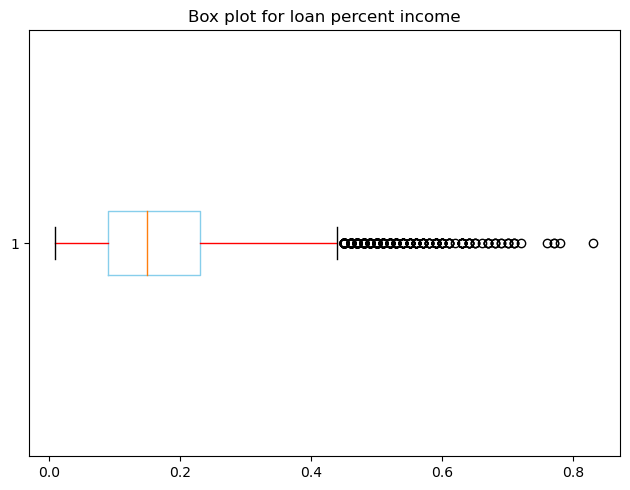

In [511]:
plt.boxplot(ref_credit_data_df['loan_percent_income'], vert=False, boxprops=dict(color='skyblue'), whiskerprops=dict(color='red'))
plt.tight_layout()
plt.title("Box plot for loan percent income")
plt.show()

In [251]:
outlier_percent=  len(ref_credit_data_df.loc[ref_credit_data_df['loan_percent_income'] > 0.45]) * 100 / len(ref_credit_data_df)
print("approximately loan_percent_income feature has {:.2f}% outliers".format(outlier_percent))

approximately loan_percent_income feature has 1.74% outliers


In [510]:
print("Mode Value : ", ref_credit_data_df['loan_percent_income'].mode()[0])

Mode Value :  0.1


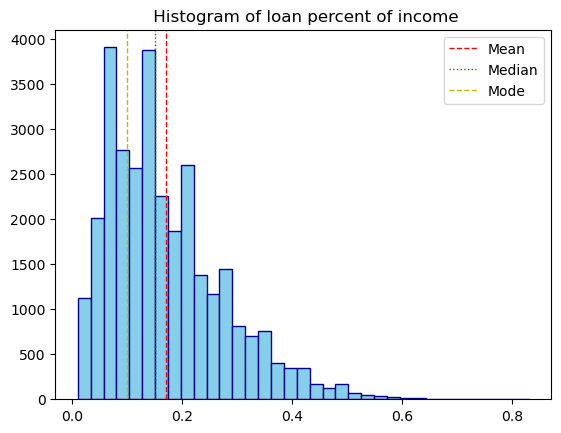

In [255]:
# Creating a  histogram 
plt.hist(ref_credit_data_df['loan_percent_income'], bins=35, color='skyblue', edgecolor='darkblue')

# Adding median,  mean and mode lines to visually locate them
plt.axvline(np.mean(ref_credit_data_df['loan_percent_income']) , color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(ref_credit_data_df['loan_percent_income']), color='g', linestyle='dotted', linewidth=1, label='Median')
plt.axvline(ref_credit_data_df['loan_percent_income'].mode()[0], color='y', linestyle='dashed', linewidth=1, label='Mode')


plt.title(' Histogram of loan percent of income')

# Add legend
plt.legend()

# Display the plot
plt.show()

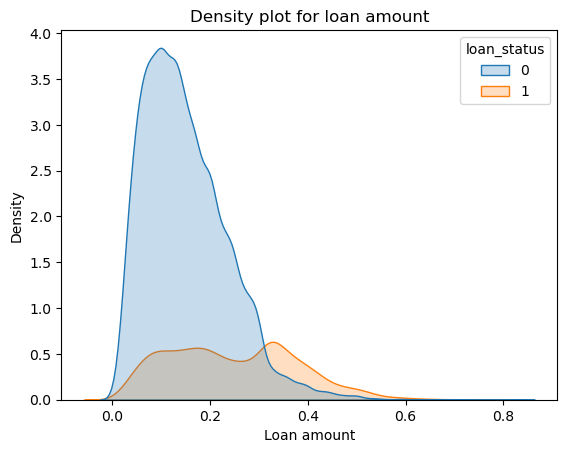

In [507]:
# Density Plot
sns.kdeplot(data=ref_credit_data_df, x="loan_percent_income", hue="loan_status", fill=True)
plt.xlabel('Loan amount')
plt.title('Density plot for loan amount')

plt.show()

Observations
- Loan percent of income has a MEAN value of 0.17  and MEDIAN at 0.15.
- Most of the loan amount value, MODE is  0.10
- Distribution is skewed to the right with along tail as visible in the box plot and histogram.
- Mean is more than the median value also indicates right skewness.
- Kurtosis is sharp

-------
-------

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

 ### Plotting PMF for all applicants age and PMF of the MORTGAGE home owners age (subset)  ###

In [271]:
# Get a applicant's age column data 
appl_age = ref_credit_data_df['person_age']

In [281]:
# Get a mortgage home owner applicant's age column data 
mortgage_own_age = ref_credit_data_df[ ref_credit_data_df['person_home_ownership'] == 'MORTGAGE']['person_age'] 

In [286]:
# A method to calculate PMF
def calculatePMF(data):
    # Calculate the frequency of each unique value
    unique_values, counts = np.unique(data, return_counts=True)
    total_len = len(data)
    pmf = counts / total_len
    return unique_values, pmf

In [287]:
age_uniq_val, appl_age_pmf = calculatePMF(appl_age)

In [282]:
mor_own_uniq_val, mortgage_ownr_age_pmf = calculatePMF(mortgage_own_age)

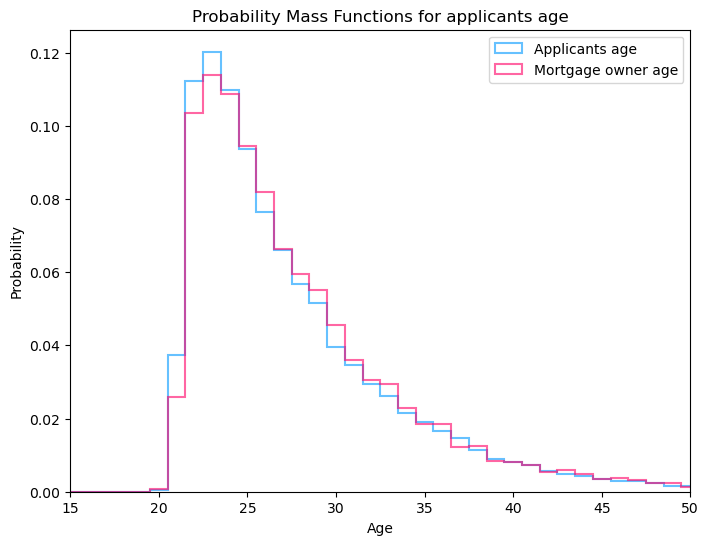

In [306]:
# Creating the histogram
plt.figure(figsize=(8, 6))

# Plotting the first PMF histogram
plt.hist(appl_age, bins=np.arange(0, max(appl_age) + 1.5) - 0.5, density=True, alpha=0.6, edgecolor='#0099ff', label='Applicants age',  histtype='step', linewidth=1.5)

# Plotting the second PMF histogram
plt.hist(mortgage_own_age, bins=np.arange(0, max(mortgage_own_age) + 1.5) - 0.5, density=True, alpha=0.6, edgecolor='#ff0066', label='Mortgage owner age',  histtype='step', linewidth=1.5)

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability Mass Functions for applicants age')
plt.legend()
#plt.grid(True)
plt.xlim(15,50)
plt.show()

Two sets of data is used to compare the PMF.  

- The first group is age of all the applicants, 

- The second group is a subset of the first one,  age of applicants which own a house but is on mortgage.

**Observations**

- The PMF shows that the for any applicants chosen, probability that their age being any value between 23 to 32 is high ,( 12% to 4% from 23 to 32) 

- The Probability distribution between those two groups is almost identical , except the mortgaged applicants higher probability is 11%

-----
-----


Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

### Plotting CDF for person_age ####

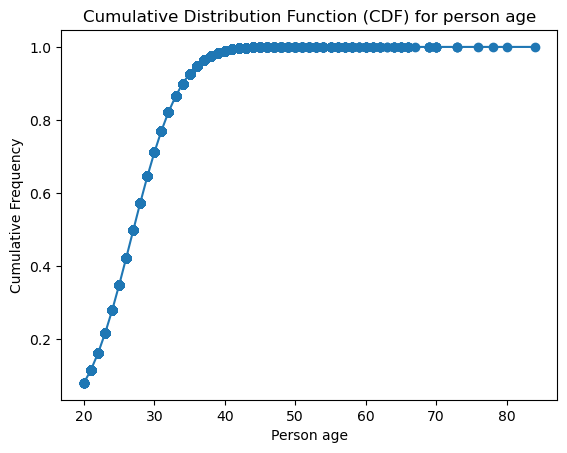

In [336]:
import scipy.stats as stats

# Extrcat the person_age feature values
appl_age = ref_credit_data_df['person_age']

appl_age = np.sort(appl_age)

#calculate cdf values
cdf_val = stats.poisson.cdf( appl_age , np.mean(appl_age) )

# Plot the CDF
plt.plot(appl_age, cdf_val, 'o-')

plt.xlabel('Person age')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Distribution Function (CDF) for person age')
#plt.grid(True)
plt.show()

**Observations**
From the CDF plot curve  ,  the cumulative % of applicants at a given age value is listed below

- % of applicant's below age 20 : 0.05% 
- % of applicant's below age 21 : 3.79% 
- % of applicant's below age 22 : 15.01% 
- % of applicant's below age 23 : 27.04% 
- % of applicant's below age 24 : 38.02% 
- % of applicant's below age 25 : 47.39% 
- % of applicant's below age 30 : 76.46% 
- % of applicant's below age 35 : 89.53% 
- % of applicant's below age 40 : 95.51% 
- % of applicant's below age 45 : 98.02% 
- % of applicant's below age 50 : 99.14% 
- % of applicant's below age 60 : 99.80% 
- % of applicant's below age 70 : 99.98% <br><br>



- From the CDF curve 95%  of the applicants are under the  40 (  from age 20)
- 75% of the applicants are  between 20 to 30 years old 

-----
-----


Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

#### Plot 1 Analytical distribution ####

In [349]:
import thinkstats2
import thinkplot

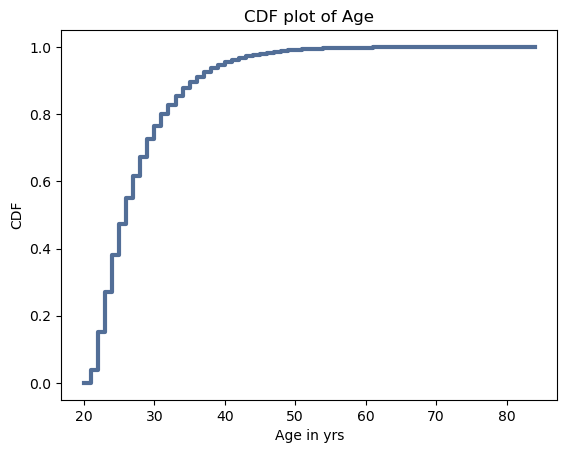

In [581]:
cdf_age = thinkstats2.Cdf(appl_age, label="age")

thinkplot.Cdf(cdf_age)
thinkplot.Config(xlabel="Age in yrs", ylabel="CDF", title="CDF plot of Age",)

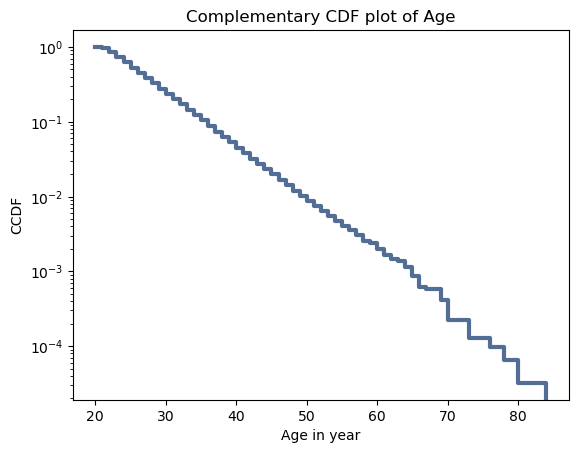

In [582]:
# Log 10 plot 
thinkplot.Cdf(cdf_age, complement=True)
thinkplot.Config(
    xlabel="Age in year",
    title="Complementary CDF plot of Age",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

**Observations on CDF plot and Complementary CDF plot**

The all applicant age’s  CDF distribution is plotted, CDF plot of age,   to illustrate the **empirical  distribution**
representing the actual frequencies of probabilities


For statistical inference,  an analytical distribution is used  by using an mathematical function , complement of CDF values  i.e. 1 – cdf value,  is plotted against a log scale.   This helps to understand if the data from an exponential distribution is a straight line.  From the Complimentary CDF plot of age ,  it is almost a straight line  breaking after age 65 proving that the data fits for exponential distribution


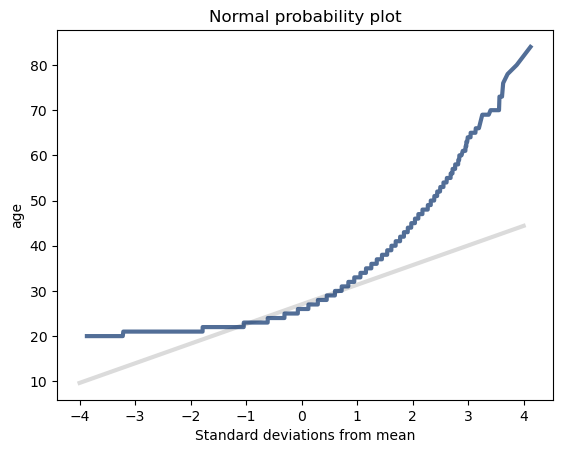

In [570]:
# Plot the standard deviations from mean -  
mean, var = thinkstats2.TrimmedMeanVar(appl_age, p=0.05)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=3, color="0.8")

xs, ys = thinkstats2.NormalProbability(appl_age)
thinkplot.Plot(xs, ys, label="all applicant age")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="age",
)

**Observation on Norml pobability plot**

To validate whether the data distribution is normal  by comparing with a standard normal distribution.

Generate a random sample from similar to the applicant’s age data  using mean value 0 and standard deviation 1

Plot both the standard deviation over mean for both the age data and standard distribution sample.  

From the plot both the curves are close or match near the mean and deviate after 1 standard deviation  on either side.  Meaning most of the data distribution is normal with 1 standard deviation



In [590]:
def MakeNormalModel(feature, label, p=0.001):
    cdf_val = thinkstats2.Cdf(feature, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(feature, p)
    std = np.sqrt(var)
    #print("n, mean, std", len(feature), mean, std)

    xmin = mean - 6 * std
    xmax = mean + 6 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.6")
    thinkplot.Cdf(cdf_val)

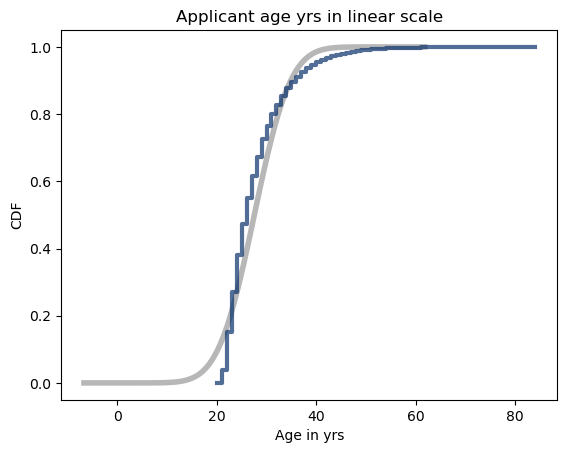

In [591]:
MakeNormalModel(appl_age, "Age", p=0.005)
thinkplot.Config(
    title="Applicant age yrs in linear scale",
    xlabel="Age in yrs",
    ylabel="CDF",
    loc="upper right",
)

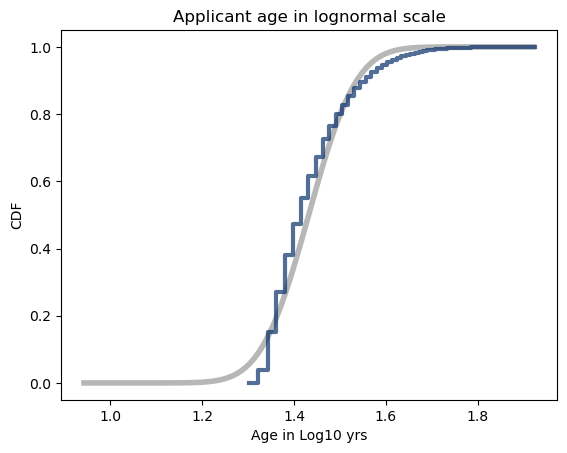

In [592]:
# Use log normal to find mor deviations or errors 
log_age = np.log10(appl_age)
MakeNormalModel(log_age, "Age", p=0.005)
thinkplot.Config(
    title="Applicant age in lognormal scale",
    xlabel="Age in Log10 yrs",
    ylabel="CDF",
    loc="upper right",
)

**Observations**

Plot the CDF distribution and compare against standard normal distribution.  
To analyze the deviation better compare it against the lognormal exponential distribution of CDF (log values CDF)  vs standard normal distribution

From both the plots ,  it is evident that the applicant age data distribution follows almost a normal distribution.   It helps to understand that this data aids in predictions

-----
-----

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis

**A scatter plot comparing  age and loan amount is drawn  and visually it show a positive co-relation,  but need the magnitude and statistical significance of the correlation.**  


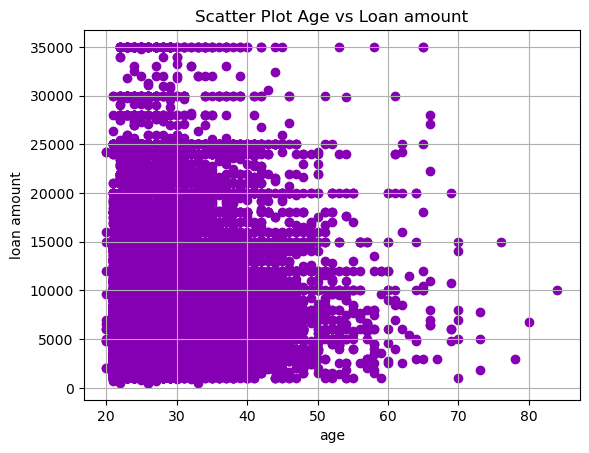

In [604]:
age_values = ref_credit_data_df['person_age']
loan_amt_values = ref_credit_data_df['loan_amnt']
plt.scatter(age_values, loan_amt_values, color='#8600b3', marker='o')

# Add labels and title
plt.xlabel('age')
plt.ylabel('loan amount')
plt.title('Scatter Plot Age vs Loan amount')

# Display the plot
plt.grid(True)
plt.show()

**Observation**

A scatter plot comparing  age and loan amount is drawn  and visually it show a positive co-relation,  but need the magnitude and statistical significance of the correlation.   



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


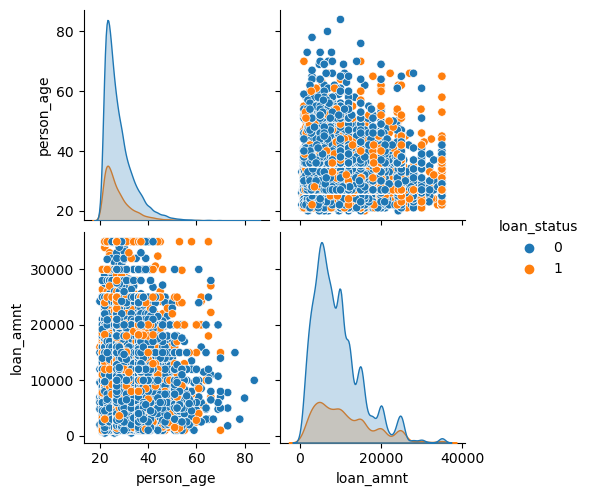

In [378]:
pirplot_lst = ['person_age', 'loan_amnt', 'loan_status']
sns.pairplot(ref_credit_data_df[pirplot_lst], hue='loan_status')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


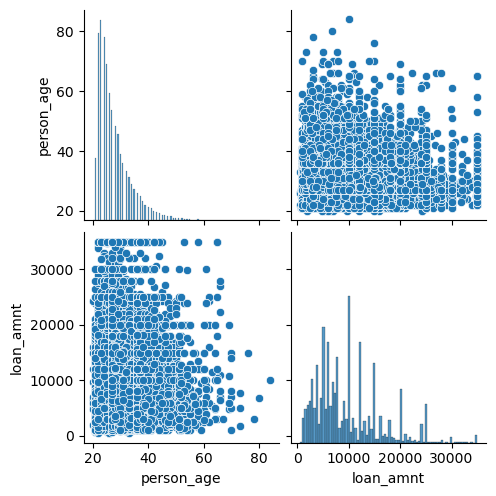

In [379]:
pirplot_lst = ['person_age', 'loan_amnt']
sns.pairplot(ref_credit_data_df[pirplot_lst])
plt.show()

Pair plot shows the scatter data on different prespective

In [599]:
# Pearson correlation between age and loan amount
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(age_values, loan_amt_values)
print('Pearson Correlation : ', pearson_corr)
print('P-value : ', p_value)

Pearson Correlation :  0.0435924739608447
P-value :  1.483073598829262e-14


In [381]:
# Spearman correlation between  age and loan amount
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(ref_credit_data_df['person_age'], ref_credit_data_df['loan_amnt'])
print("Spearman's Correlation : ", spearman_corr )
print('P-value : ', p_value)

Spearman's Correlation :  0.057517282050509634
P-value :  3.359184323061208e-24


In [382]:
covariance = ref_credit_data_df['person_age'].cov(ref_credit_data_df['loan_amnt'])
print("Co=variance : " ,  covariance )

Co=variance :  1672.0696747906761


In [374]:

from sklearn.preprocessing import MinMaxScaler

def normalizeData(series):
    # Reshape the series to a 2D array (required by MinMaxScaler)
    reshaped_series = series.reshape(-1, 1)

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(reshaped_series)

    # Convert the normalized data back to a Series
    normalized_series = pd.Series(normalized_data.flatten())
    
    return normalized_series


In [383]:
appl_age_df = normalizeData( ref_credit_data_df['person_age'] )
loam_amt_df = normalizeData( ref_credit_data_df['loan_amnt'] )

In [385]:
covariance = appl_age_df.cov(loam_amt_df)
print("Co=variance : " ,  covariance )

Co=variance :  0.009304957127278272


**Observations**

- A scatter plot comparing  age and loan amount is drawn  and visually it show a positive co-relation,  but need the magnitude and statistical significance of the correlation.   

Pearson Correlation    :  0.0435924739608447
P-value                        :  1.483073598829262e-14

- Pearson correlation coefficient ρ=0.044r=0.044 suggests a very weak positive linear relationship between the two variables.
- But  Extremely small p-value of 1.48×10−141.48×10−14 indicates that the observed correlation coefficient is statistically significant.

Spearman's Correlation :  0.057517282050509634
P-value                           :  3.359184323061208e-24

- Spearman correlation coefficient ρ=0.058ρ=0.058 indicates a very weak positive monotonic relationship between the two variables
- Extremely small p-value of 3.36×10−243.36×10−24 indicates that the observed Spearman correlation coefficient is statistically significant.

Co=variance :  0.009304957127278272

- The magnitude of the covariance (0.0093) indicates that there is some degree of linear association between the two variables

**Conclusion**
- With such a small p-value,  the null hypothesis  can be rejected and conclude that there is a statistically significant linear relationship between the two variables

-----
-----

#### Conduct a test on your hypothesis using one of the methods covered in Chapter 9. ####

**Null Hypothesis** :  One way to model the null hypothesis is by permutation; that is,  People those have  mortgaged or  rented a house have almost simillar  defaulted rate on file and difference is not statistically different.
Using permutation,  combine both the gourp,  shuffle and find the mean using multiple iteration and find the mean difference

Create 2 subsets  of  ‘cb_person_default_on_file_d’ ,  credit default history on file,  data   by filtering  home ownership data using values ‘MORTGAGE’  and ‘RENT’

Calculate the absolute mean difference  between these two subset of data 

Conduct an iteration (1000 in this case) to permutate the data  (by grouping and shuffing two subset of data and then splitting again)   and find the mean difference between those shuffled groups.

Find the p-value using the absolute means and the shuffled data means (check if the shuffled mean is above absolute mean) and find ration of count vs number of iterations. 

In [386]:
mrtgag_credit_hist =  ref_credit_data_df[ref_credit_data_df['person_home_ownership'] == 'MORTGAGE']['cb_person_default_on_file_d'] 
rented_credit_hist =  ref_credit_data_df[ref_credit_data_df['person_home_ownership'] == 'RENT']['cb_person_default_on_file_d'] 

In [398]:
# stack the dataframe horizontally to shuffle them randomly
stacked_data = np.hstack((mrtgag_credit_hist, rented_credit_hist))

def shuffledata(stackeddata, grp1_len,  grp2_len):
    np.random.shuffle(stackeddata)
    shuffGrp = stackeddata[:grp1_len], stackeddata[grp1_len:]
    return shuffGrp

def getDatagroupMeanDiff(grpdData):
    dataGrp1, datGrp2 = grpdData
    grp_diff_mean = abs(dataGrp1.mean() - datGrp2.mean())
    return grp_diff_mean




In [399]:
len_mrtgag = len(mrtgag_credit_hist)
len_rent   = len(rented_credit_hist)

In [436]:
abs_mean = abs(mrtgag_credit_hist.mean() - rented_credit_hist.mean())
print("Absolute mean is : " , abs_mean)

Absolute mean is :  0.05090471129486496


In [433]:
iter_mean_reslt = [getDatagroupMeanDiff(shuffledata(stacked_data, len_mrtgag, len_rent )) for _ in range(1000)]

In [438]:
net_mean_count = sum(1 for x in iter_mean_reslt if x >= abs_mean)

In [606]:
p_val = net_mean_count / 1000
print( "P Value from permutated groups means and absolute mean  is ", p_val )

P Value from permutated groups means and absolute mean  is  0.0


- The absolute mean difference of 0.05 suggests that there is a substantial difference between the means of the two groups. Since the absolute mean difference is not close to zero, it indicates that the groups are different in terms of the "defaulted rate on file" being measured.
- A permuted p-value of 0 means that in all of the permutations performed,  none of the permutations resulted in a difference as extreme as the observed difference between the two groups. It's highly unlikely to observe such a large difference if there were no true difference between the groups. Therefore, the null hypothesis that there is no difference between the groups is rejected.

----
----

#### Conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). Your code or screenshots of your code ####

To Conduct Least squares we use the age and interest rate  for the applicants who has a home rented. 

Filter the data frame by rented home owner column.
Create the subset of data of age and interest rate

Find the slope and intercept  ,  first degree polynomial ,  of age and interest rate
Plot the data and the regression line and understand if the relationship is linear.


In [650]:
rented_crdt_df =  ref_credit_data_df[ref_credit_data_df['person_home_ownership'] == 'RENT']
rented_crdt_df = rented_crdt_df.dropna()

In [651]:
rent_age = rented_crdt_df.person_age
int_rate = rented_crdt_df.loan_int_rate
int_rate_log = np.log10(int_rate)

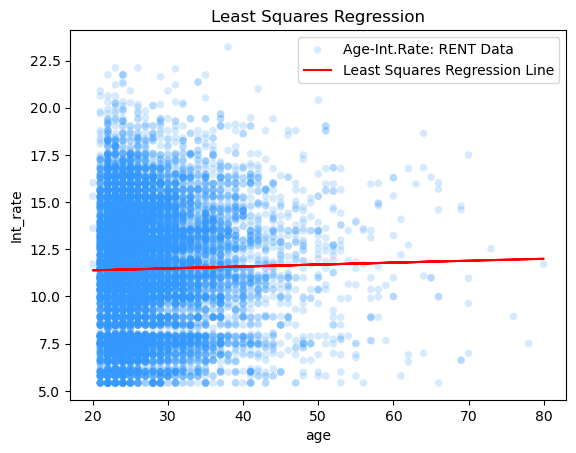

In [659]:
# Perform linear regression
# Fit a first-degree polynomial (linear regression)
coefficients = np.polyfit(rent_age, int_rate, 1)  
slope, intercept = coefficients

# Calculate the predicted values
predicted_y = slope * rent_age + intercept

# Plot the original data points
plt.scatter(rent_age, int_rate, color='#3399ff', label='Age-Int.Rate: RENT Data', alpha=0.2, s=30, edgecolors="none")

# Plot the least squares regression line
plt.plot(rent_age, predicted_y, color='red', label='Least Squares Regression Line')

# Add labels and title
plt.xlabel('age')
plt.ylabel('Int_rate')
plt.title('Least Squares Regression')
plt.legend()


# Display the plot
plt.show()

In [660]:
print("Slope     : {:.4f}".format(slope))
print("intercept : {:.4f}".format(intercept))

Slope     : 0.0102
intercept : 11.1806


In [656]:
int_rate.describe().apply("{0:.2f}".format)

count    14418.00
mean        11.46
std          3.12
min          5.42
25%          8.94
50%         11.49
75%         13.61
max         23.22
Name: loan_int_rate, dtype: object

**Observations**

Slope     :  0.0102
intercept :  11.1806

The Regression line  intercept  of starts close to interest rate’s mean value of 11.46.
The slope indicates a linear relationship of 0.012 unit  increase in interest rate for every  I unit of age (1 yr.)



Perform Regression analysis using multiple variables

Regression analysis on "Credit default status on file" against "Percentage of loan against income"  and "Income earned"


In [664]:
import statsmodels.formula.api as smf

# build the regression formula to input the independent predictor and response /  dependent varaibles 
reg_formula = 'loan_status ~ loan_percent_income + person_age+cb_person_default_on_file_d'
# Create the model
reg_model = smf.ols(reg_formula, data=ref_credit_data_df)
# Fit the data and find out the results
results = reg_model.fit()
# Print the sumary to view the co-efficients,  T-value, P-Value,  Std-Error etc
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_status   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     2171.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:16:21   Log-Likelihood:                -13616.
No. Observations:               31084   AIC:                         2.724e+04
Df Residuals:                   31080   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0452      0.010     -4.314      0.000      -0.066      -0.025
loan_percent_income             1.4542      0.020     72.514      0.000       1.415       1.494
person_age                     -0.0007      0.000     -1.922      0.055      -0.001    1.33e-05
cb_person_default_on_file_d     0.1801      0.006     32.324      0.000       0.169       0.191
==============================================================================
Omnibus:                     4584.944   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6912.095
Skew:                           1.142   Prob(JB):                         0.00
Kurtosis:                       3.353   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Observations** ####

**"Percentage of loan against income“, loan_percent_income**
- The predictor has a co-eff of 1.45 suggests a very good positive effect on response variable,  1 unit of loan percent will increase the loan_status by 1.45 units, holding all other variables constant.

- A positive standard error value of 0.02 indicates very less uncertainty with the co-efficient value, suggests co-efficient value is relatively precise

- T-static of 72 indicates co-eff estimate is 72 standard error times away from zero, large absolute value of the t-statistic indicates a strong signal relative to the noise

- The p-value of 0.0 , even though ideal ,  higher than 0.05 indicates that is predictor may not be statistically significant to reject the null hypothesis that on relationship. It suggests strong evidence against the null hypothesis, indicating that the effect of the predictor variable is statistically significant.



**“applicant’s age”,  person_age**
- The predictor has a co-eff of -0.0007  suggest that , a one-unit increase in the predictor variable, the response variable is expected to decrease by 0.0007 units.

- A positive standard error value 0 indicates that there is no variability or uncertainty in the coefficient 

- T-static of -1.92,  a negative t-statistic indicates that the coefficient estimate is negative

- The p-value of 0.055 , suggests weak evidence against the null hypothesis,  the value just above the border hence it is statistically significant.



**"Credit default status on file" , cb_person_default_on_file_d**
- The predictor has a co-eff of 0.18 suggest that the predictor variable has very small effect on response variable.

- A positive small standard error value 0.006  indicates more precise estimation of the coefficient.

- Large T-static value of   32,32 indicates a strong signal relative to the noise

- The p-value of 0.0 , suggests strong evidence against the null hypothesis
